<a href="https://colab.research.google.com/github/red2506/sonicDparkhog/blob/main/dsassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#options(width=100)
#knitr::opts_chunk$set(out.width='1000px',dpi=200,message=FALSE,warning=FALSE)

In [ ]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns; sns.set()
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


#for encoding
from sklearn.preprocessing import LabelEncoder



#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
from sklearn.tree import plot_tree

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:


df1 = pd.read_csv('/content/drive/MyDrive/data_sci_ws/sdata.csv', index_col='Name', parse_dates=True)



In [ ]:
df1.columns

Index(['Calories', 'Fat', 'Carb', 'Fiber', 'Protein', 'Sodium', 'Type'], dtype='object')

In [ ]:
print("data is loaded")
df1

data is loaded


,Calories,Fat,Carb,Fiber,Protein,Sodium,Type
Name,,,,,,,
Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10,Healthy
Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10,Healthy
Very Berry Hibiscus Starbucks Refreshers™ Beverage,60,0,14,1,0,10,Healthy
Iced Coffee,0,0,0,0,0,0,Healthy
Iced Espresso Classics - Vanilla Latte,130,3,21,0,5,65,Healthy
...,...,...,...,...,...,...,...
Mocha Light Frappuccino® Blended Coffee,140,1,28,1,4,180,Healthy
Cinnamon Dolce Crème,200,6,28,0,10,135,Unhealthy
Vanilla Crème,200,6,28,0,10,135,Unhealthy


In [ ]:
df1.columns

Index(['Calories', 'Fat', 'Carb', 'Fiber', 'Protein', 'Sodium', 'Type'], dtype='object')

In [ ]:
df1.shape

(91, 7)

In [ ]:
x_axis=df1.index

In [ ]:
y_axis=df1.Calories

plotting the histogram

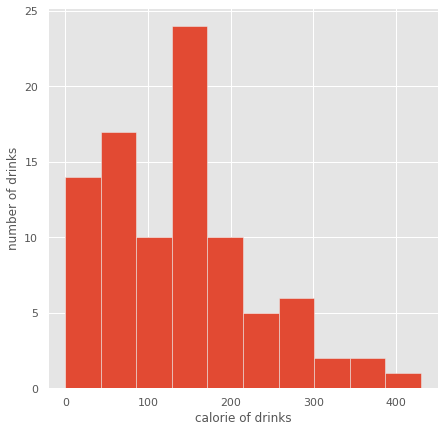

In [ ]:
style.use('ggplot')
plt.figure(figsize=(7,7))
plt.hist(y_axis)
plt.xlabel('calorie of drinks')
plt.ylabel('number of drinks')
plt.show()

plotting a scatter plot

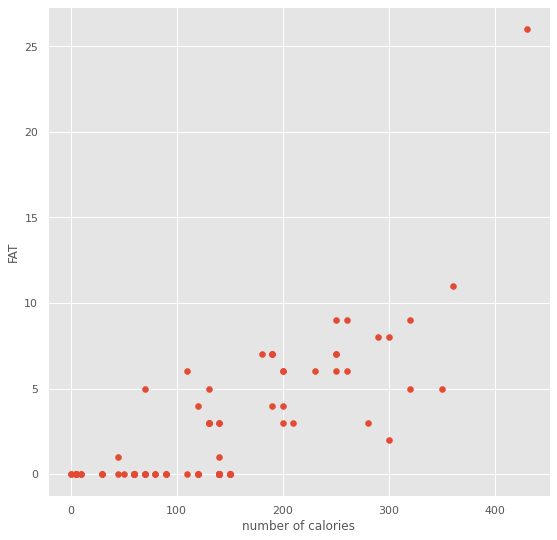

In [ ]:
style.use('ggplot')
plt.figure(figsize=(9,9))
plt.scatter(df1.Calories,df1.Fat)
plt.xlabel('number of calories')
plt.ylabel('FAT')
plt.show()

In [ ]:
#getting information of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, Cool Lime Starbucks Refreshers™ Beverage to Strawberry Smoothie
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Calories  91 non-null     int64 
 1   Fat       91 non-null     int64 
 2   Carb      91 non-null     int64 
 3   Fiber     91 non-null     int64 
 4   Protein   91 non-null     int64 
 5   Sodium    91 non-null     int64 
 6   Type      91 non-null     object
dtypes: int64(6), object(1)
memory usage: 7.7+ KB


In [ ]:
df1.columns

Index(['Calories', 'Fat', 'Carb', 'Fiber', 'Protein', 'Sodium', 'Type'], dtype='object')

In [ ]:
df1.corr()


,Calories,Fat,Carb,Fiber,Protein,Sodium
Calories,1.000000,0.761808,0.872492,0.519145,0.775018,0.730375
Fat,0.761808,1.000000,0.381300,0.389915,0.709711,0.690200
Carb,0.872492,0.381300,1.000000,0.443874,0.482032,0.456264
Fiber,0.519145,0.389915,0.443874,1.000000,0.541308,0.354715
Protein,0.775018,0.709711,0.482032,0.541308,1.000000,0.803971
Sodium,0.730375,0.690200,0.456264,0.354715,0.803971,1.000000


In [ ]:
df1.head()
df1.reset_index(inplace=True)

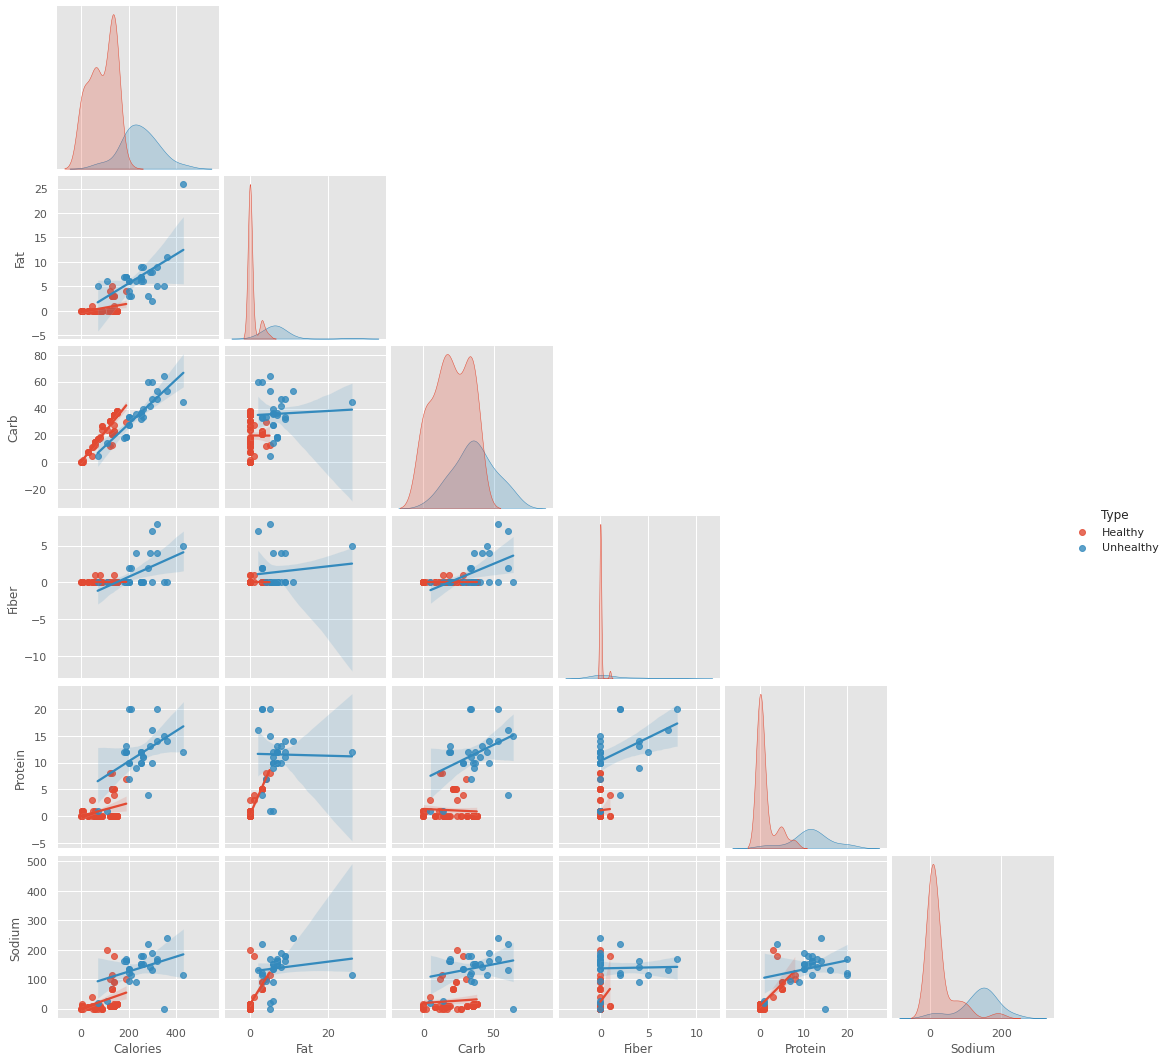

In [ ]:
sns.pairplot(data=df1, hue="Type", corner=True, kind='reg')

<function matplotlib.pyplot.show>

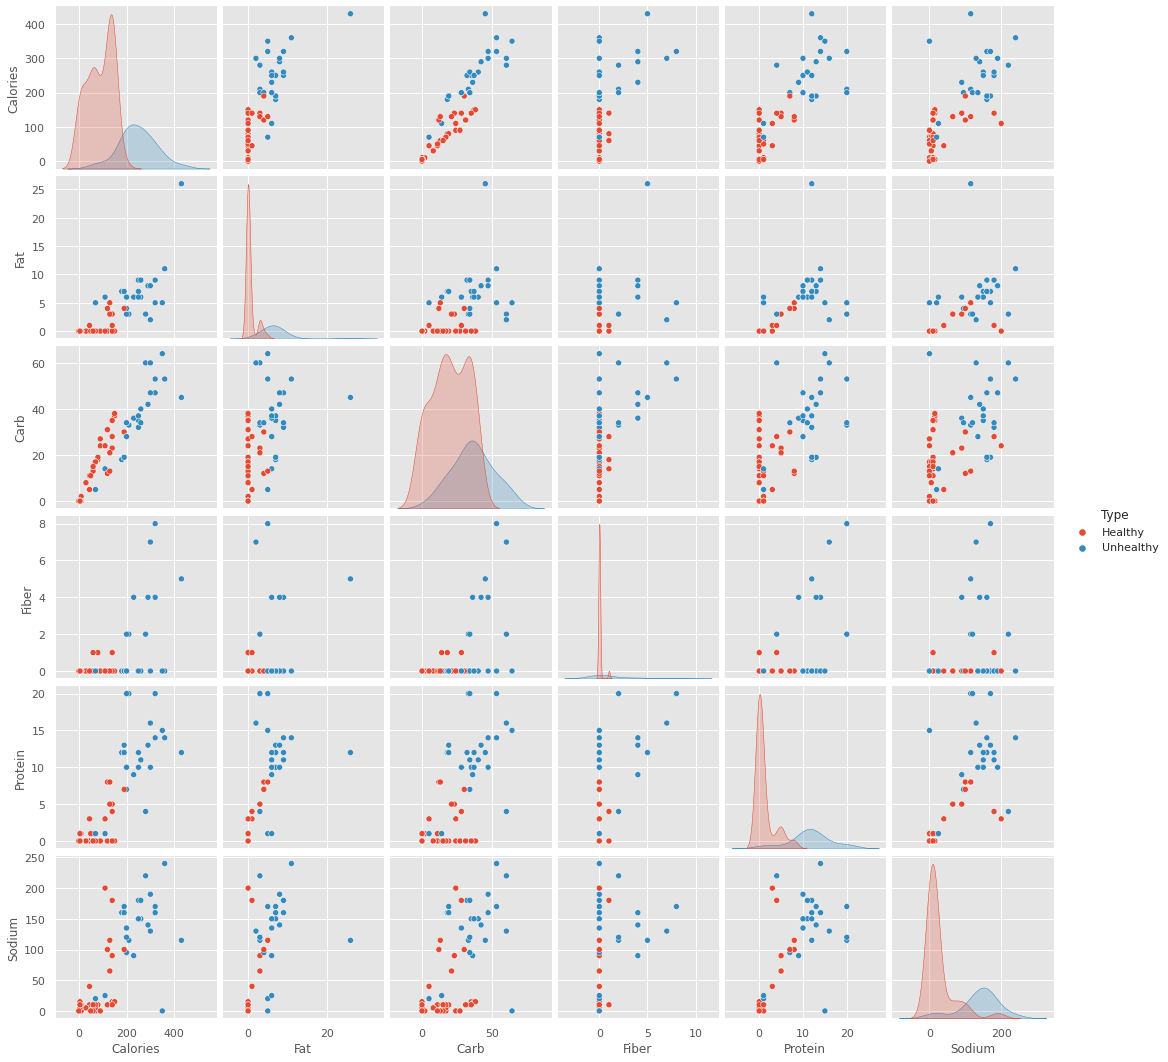

In [ ]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df1, hue = 'Type')
plt.show

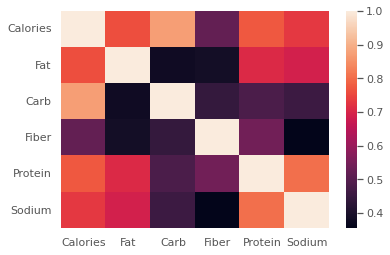

In [ ]:
# correlation matrix
sns.heatmap(df1.corr())
plt.savefig("one.png")

In [ ]:

df2 = df1.copy()
df2 = df1.drop('Name', axis =1)

df2.shape

(91, 7)

In [ ]:
target = df2['Type']
df3 = df2.copy()
df3 = df2.drop('Type', axis =1)
df3.shape

(91, 6)

In [ ]:
df2.head()

,Calories,Fat,Carb,Fiber,Protein,Sodium,Type
0,45,0,11,0,0,10,Healthy
1,80,0,18,1,0,10,Healthy
2,60,0,14,1,0,10,Healthy
3,0,0,0,0,0,0,Healthy
4,130,3,21,0,5,65,Healthy


In [ ]:
df3.head()

,Calories,Fat,Carb,Fiber,Protein,Sodium
0,45,0,11,0,0,10
1,80,0,18,1,0,10
2,60,0,14,1,0,10
3,0,0,0,0,0,0
4,130,3,21,0,5,65


In [ ]:
# Defining the attributes
X = df3

In [ ]:
target

0       Healthy
1       Healthy
2       Healthy
3       Healthy
4       Healthy
        ...    
86      Healthy
87    Unhealthy
88    Unhealthy
89    Unhealthy
90    Unhealthy
Name: Type, Length: 91, dtype: object

In [ ]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target
y = target


In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)

print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (72, 6)
Testing split input-  (19, 6)


In [ ]:
# Defining the decision tree algorithm

dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [ ]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       1.00      0.75      0.86         4

    accuracy                           0.95        19
   macro avg       0.97      0.88      0.91        19
weighted avg       0.95      0.95      0.94        19



In [ ]:
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix>

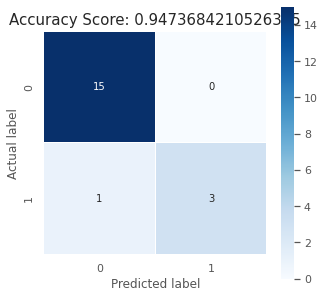

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

plt.savefig("one.png")

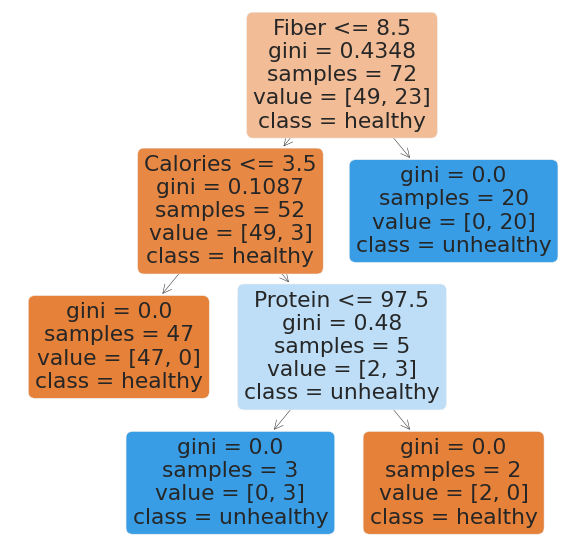

In [ ]:
# Visualising the graph without the use of graphviz

plt.figure(figsize = (10,10))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["healthy", "unhealthy"] , filled = True , precision = 4, rounded = True)

plt.savefig("one.png")

# Task4

In [ ]:
correlation_matrix = df1.corr()
res_corr = correlation_matrix["Calories"]
print (res_corr)

Calories    1.000000
Fat         0.761808
Carb        0.872492
Fiber       0.519145
Protein     0.775018
Sodium      0.730375
Name: Calories, dtype: float64


In [ ]:
X = df3.drop("Calories", axis=1)
X = X.values
y = df3["Calories"]
y = y.values

In [ ]:
new_data_point = np.array(res_corr[:-1])
print (new_data_point)

[1.         0.76180822 0.87249234 0.51914485 0.77501827]


In [ ]:
distances = np.linalg.norm(X - new_data_point, axis=1)


In [ ]:
k = 3
nearest_neighbor_ids = distances.argsort()[:k]
nearest_neighbor_ids

array([ 3, 57, 37])

In [ ]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 0,  0, 10])

In [ ]:
nearest_neighbor_rings = y[nearest_neighbor_ids]
nearest_neighbor_rings

array([ 0,  0, 10])

In [ ]:
prediction = nearest_neighbor_rings.mean()
print (prediction)

3.3333333333333335


In [ ]:
def knn_comparison(data, k):
 x = data[[‘X’,’Y’]].values
 y = data[‘class’].astype(int).values
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 plt.xlabel(‘X’)
 plt.ylabel(‘Y’)
 plt.title(‘Knn with K=’+ str(k))
 plt.show()

SyntaxError: ignored